# PART 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'svg'
sns.set()

df = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")

> Weekly patterns. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. Here's what my version looks like. Hint for comment: Some things make sense - for example drunkenness and the weekend. But there are some aspects that were surprising to me. Check out prostitution and mid-week behavior, for example!?

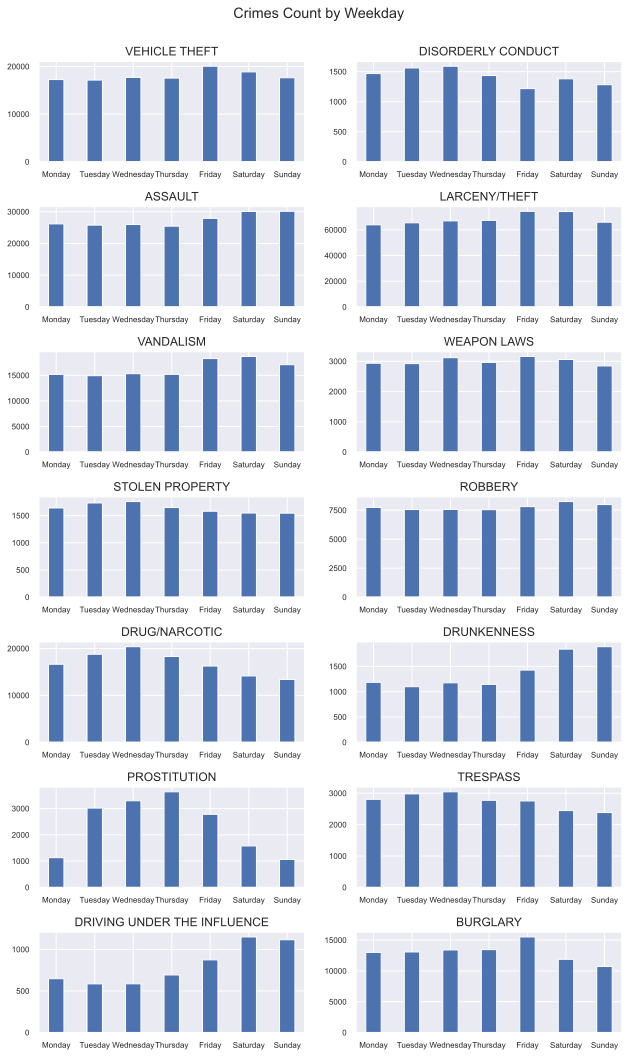

In [3]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(9,15))
fig.tight_layout(h_pad=2.0)
fig.subplots_adjust(top=0.93)
fig.suptitle("Crimes Count by Weekday")

from pandas.api.types import CategoricalDtype
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['DayOfWeek'] = df['DayOfWeek'].astype(cat_type)

for i, crime_type in enumerate(focuscrimes):
    df_CT = df[df['Category'] == crime_type]
    weekly_CT = df_CT.groupby(df_CT['DayOfWeek']).count()["PdId"]
    axs = weekly_CT.plot(kind='bar', title=crime_type, ax=axes[i//2, i%2], width=0.4, fontsize=8, rot=0, legend=None)
    axs.xaxis.set_label_text("")
plt.show()

*There is a specific data in the chart that is different from the teacher‘s. Prostitution reached its highest on Thursday instead of Wednesday. 'LARCY/THEFT' has the **largest amount** in a week for it is the most common type of crime. Consistent with common sense, several crimes **peak on weekends** like 'DRIVING UNDER THE INFLUENCE', 'VANDALISM', 'ASSAULT' and 'DRUNKENNESS'. The reason why there are more prostitutions in the middle of the week may be because Wednesday and Thursday are when people are more tired, and weekends need to be spent with family.
'DRIVING UNDER THE INFLUENCE' shows similar trend with 'DRUNKENNESS'( lower in mid-week but higher in the weekend). 'TRESPASS','DISORDERED CONDUCT','STOLEN PROPERTY' shows similar trend of 'DRUG'.
*

> The months. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?
The 24 hour cycle. We'll can also forget about weekday and simply count up the number of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see.

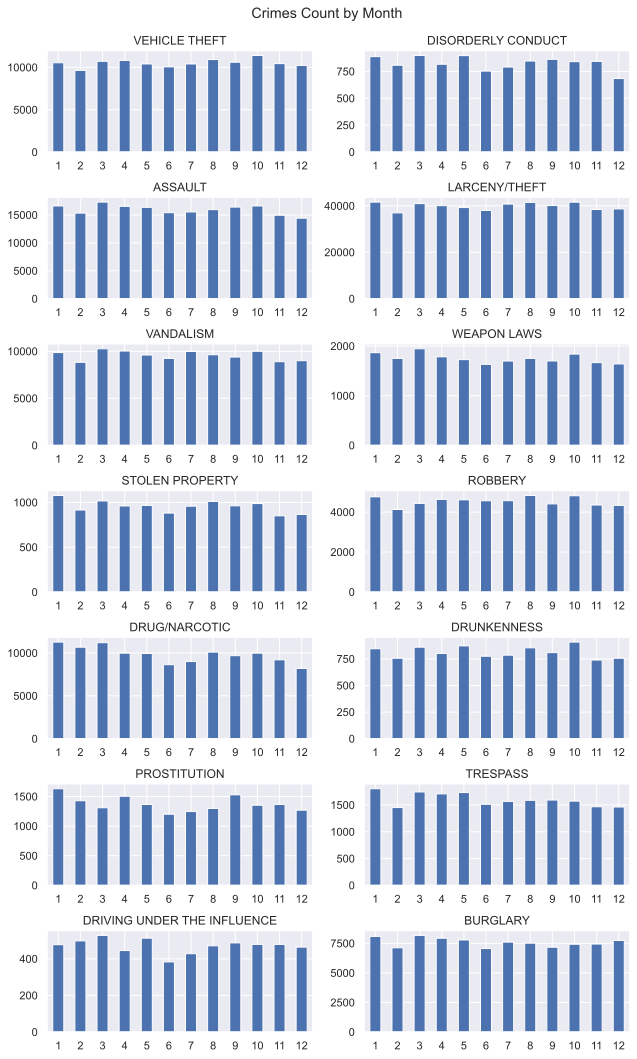

In [4]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(9,15))
fig.tight_layout(h_pad=2.0)
fig.subplots_adjust(top=0.94)
fig.suptitle("Crimes Count by Month")

df["Date"] = pd.to_datetime(df["Date"])
for i, crime_type in enumerate(focuscrimes):
    df_CT = df[df['Category'] == crime_type]
    countByMonth_CT = df_CT.groupby(df['Date'].dt.month).count()["PdId"]
    axs = countByMonth_CT.plot(kind='bar', title=crime_type, ax=axes[i//2, i%2], legend=None, rot=0)
    axs.xaxis.set_label_text("")
plt.show()

*Taking months as a cycle, it can be found that many crimes are slightly reduced in winter. Especially in November and December, many crimes like 'STOLEN PROPERTY' were **significantly reduced**. Many types of crime data have the same pattern of fluctuation that **reach a trough** in June and July. Generally, the counts are related to the days of months except Dec. which has 31 days but the count is smaller than all 30-days month for there tend to be fewer crimes and  policemen during Christmas holiday.
*

> The 24 hour cycle. We'll can also forget about weekday and simply count up the number of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see.

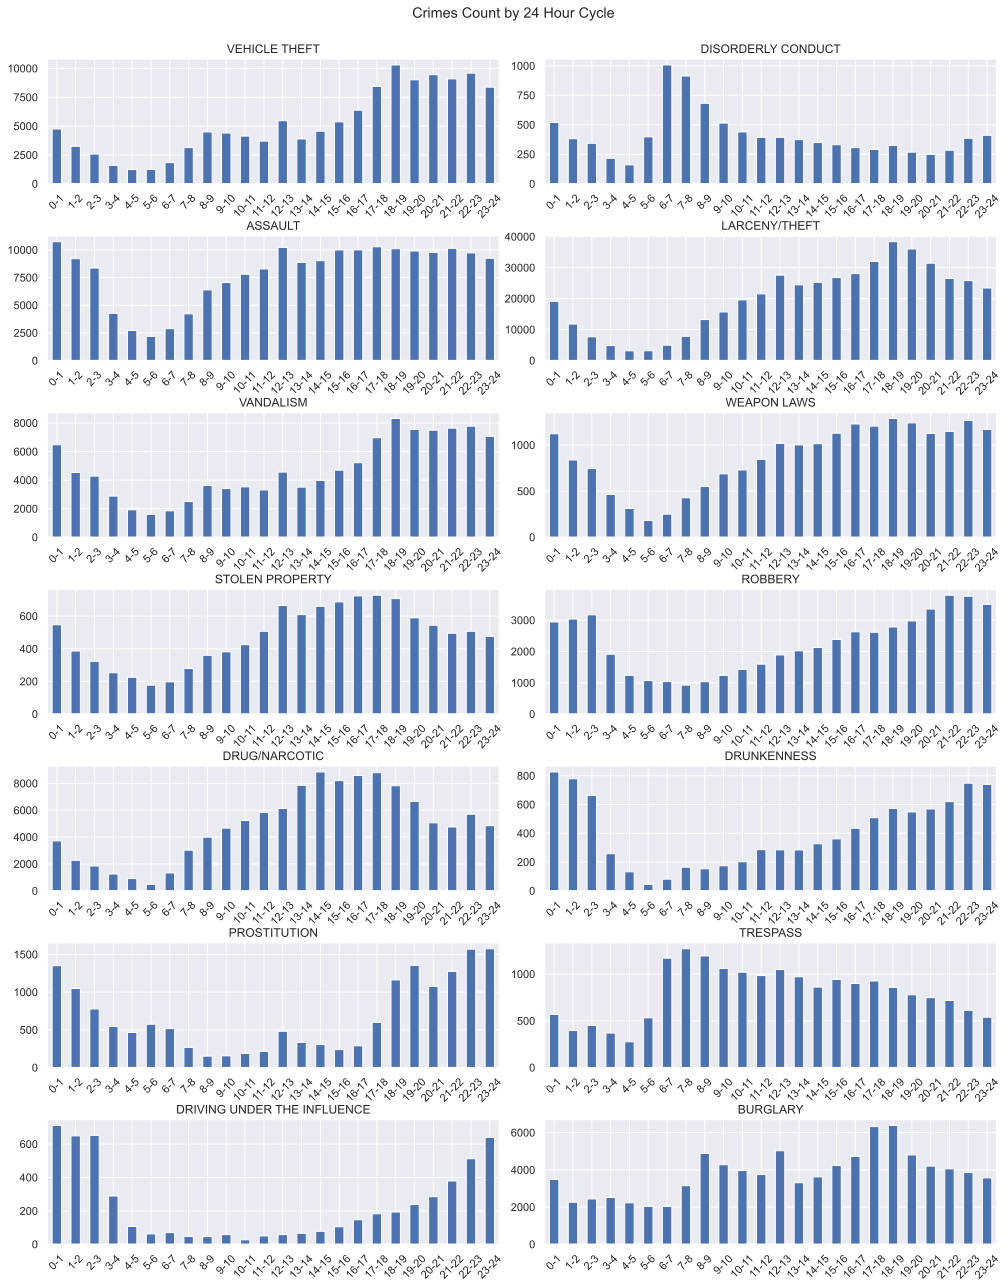

In [5]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14,18))
fig.tight_layout(h_pad=2.6)
fig.subplots_adjust(top=0.94)
fig.suptitle("Crimes Count by 24 Hour Cycle")

df['Time'] = pd.to_datetime(df['Time'])
for i, crime_type in enumerate(focuscrimes):
    df_CT = df[df['Category'] == crime_type]
    countByHour_CT = df_CT.groupby(df['Time'].dt.floor('1H')).count()["PdId"]
    axs = countByHour_CT.plot(kind='bar', title=crime_type, ax=axes[i//2, i%2], legend=None, rot=45)
    axs.set_xticklabels(['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23','23-24'])
    axs.xaxis.set_label_text("")
plt.show()

*The number of most types of crime **reaches the bottom** in the early morning and **changes continuously over time**. 'DISORDERLY CONDUCT' and 'TRESPASSING' both have a **sudden surge** at 6am. Except for 'DISORDERLY CONDUCT', 'DRUG/NARCOTIC' and few more crime types, most types have **more frequent records** at night. 'STOLEN PROPERTY' reaches its **highest** in the evening from 16-19.
'DRUNKENESS' occurs more often in mid-night reasonably but the peak of 'DRUG/NARCOTIC' should be between 13-19!
And the peak of 'DISORDERLY CONDUCT' and 'TRESPASS' is both in the morning instead of in the mid-night.
Generally, 4 to 6 am would be the safest moment with fewest crimes generally except PROSTITUTION.*

> Hours of the week. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.

In [6]:
policing_dataframe = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv', parse_dates=[['Date', 'Time']])

policing_dataframe["HourOfWeek"] = policing_dataframe["Date_Time"].dt.dayofweek * 24 + policing_dataframe["Date_Time"].dt.hour

counts_pr_category_pr_hour_pr_week = policing_dataframe.groupby(by=["HourOfWeek", "Category"]).size().reset_index(name="counts")

counts_pr_category_pr_hour_pr_week = counts_pr_category_pr_hour_pr_week.loc[counts_pr_category_pr_hour_pr_week['Category'].isin(focuscrimes)].reset_index(drop=True)
x_values = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday", "Monday"]
x_position = [0,24,48,72,96,120,144,168]
#x_position_minor = [12,36,60,84,108,132,156]
plt.figure(figsize=(14,40))

crimes = list(focuscrimes)
for i in range(len(focuscrimes)):
    temp = counts_pr_category_pr_hour_pr_week.loc[counts_pr_category_pr_hour_pr_week['Category'] == crimes[i]].reset_index(drop=True)
    x = temp["HourOfWeek"]
    y = temp["counts"]
    plt.subplot(len(crimes),1,i+1)
    plt.title(crimes[i], pad=-14)
    plt.bar(x, y, width=0.6, edgecolor="black")
    plt.xticks(x_position, x_position)
    plt.tight_layout()
    plt.ylim(top=(np.max(y)+(np.max(y)*0.3)))
    plt.grid(which="major", axis="x", color="red")
    plt.grid(which="minor", axis="x", color="gray")

*Basically, the same pattern of crime that changes with the hour is similar every day, but the peak value of each day is different. There are also extreme values like Friday 17-19 of 'BURGLARY' which is a peak but however fit the pattern.
DRUNKENNESS occurrs more often in the mid-night of Friday and Saturday which is the same as 'DRIVING UNDER THE INFLUENCE' which means these two crimes are highly related.
During 17-20 of Friday there is a surprisingly high peak of 'BURGLAR' because people tend to go out to participate in parties after a whole weeks hard work so there is no one in their houses. *

# PART 2

> As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?

*Pearson correlation r shows the linear relationship between two sets of data. The closer r is to 1, the stronger the linear correlation between the two sets of data, which can be fitted with a straight line. The formulation:* 
$$
r = \frac{n(\sum{xy}) - (\sum{x})(\sum{y})}{\sqrt{[n\sum{x^2} - (\sum{x})^2][n\sum{y^2} - (\sum{y})^2]}}
$$


> What is the difference between a bar-chart and a histogram?

*1. Histograms are used to show the distribution of variables whereas bar charts compare several variables*

*2. Histograms bins data while bar charts are categorical*

> I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it.

*There are a few ways (Quantative & Qualitative) to do it. One method I thought sounds cool is the Sturge's Rule (It has been critized for over smoothing histograms). It's more a rule of thumb than a perfect formula:*

&emsp;
$$K = 1 + 3.322 log_{n}$$
&emsp;&emsp;

*Supposedly it works best for continous data which is normally distributed and symmetrical* ([source](https://www.statisticshowto.com/choose-bin-sizes-statistics/))

# PART 3

> First, let's make a jitter-plot (that is, code up something like Figure 2-1 from DAOST from scratch), but based on SF Police data. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the exact time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.

*We import the policing dataframe, and parse the date and time as a datetime*

In [7]:
policing_dataframe = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv', parse_dates=[['Date', 'Time']])

We assign a mask to select all the data in February 2013

In [8]:
mask = (policing_dataframe['Date_Time'] > "2013-02-01") & (policing_dataframe['Date_Time'] <= "2013-06-28")
df_assaults = policing_dataframe.loc[mask].reset_index(drop=True)

*We specifically select the crimes of category == ASSAULT*

In [9]:
df_assaults = df_assaults.loc[df_assaults['Category'] == "ASSAULT"].reset_index(drop=True)

*We filter the data that happened from 21:00 - 22:00*

In [10]:
hours_in_day = [i for i in range(0,24)]
hourly_slots = {}
for i in range(len(hours_in_day)):
    if i+1 == len(hours_in_day):
        from_time = hours_in_day[i]
        to_time = hours_in_day[0]
        hourly_slots[from_time] = str(from_time) + "-" + str(to_time)
    else:
        from_time = hours_in_day[i]
        to_time = hours_in_day[i+1]
        hourly_slots[from_time] = str(from_time) + "-" + str(to_time)

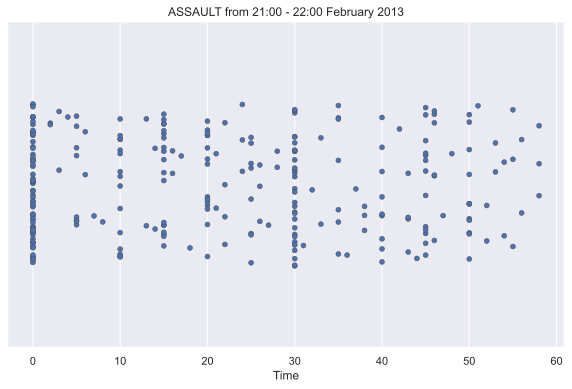

In [24]:
df_assaults["time_period"] = [hourly_slots[int(str(i).split(":")[0])] for i in list(df_assaults['Date_Time'].dt.hour)]
df_assaults_filtered = df_assaults.loc[df_assaults['time_period'] == "21-22"].reset_index(drop=True)
x = df_assaults_filtered["Date_Time"].dt.minute
plt.figure(figsize=(10,6))
ax = sns.stripplot(x=x, jitter=0.25,linewidth=0.5)
plt.title('ASSAULT from 21:00 - 22:00 February 2013')
plt.xlabel('Time')
plt.show()

*From the above plot it is obvious that the police have a tendency to round up to the nearest 10 minutes especially hour and half hour. Or crimes just happen like that - which seems hard to believe ;)*

> Now for some histograms (please create a crime-data based versions of the plot-type shown in DAOST Figure 2-2). (I think the GPS data could be fun to understand from this perspective.)
> - This time, pick two crime-types with different geographical patterns and a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
> - Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like numpy.histogram. This function gives you the counts and then you do your own plotting.

In [12]:
df_vth = df[df['Category'] == 'VEHICLE THEFT']
mask = (df_vth['Date'] >= '2014-2-1') & (df_vth['Date'] <= '2014-7-31')
df_vth = df_vth.loc[mask]

df_bg = df[df['Category'] == 'BURGLARY']
mask = (df_bg['Date'] >= '2014-2-1') & (df_bg['Date'] <= '2014-7-31')
df_bg = df_bg.loc[mask]

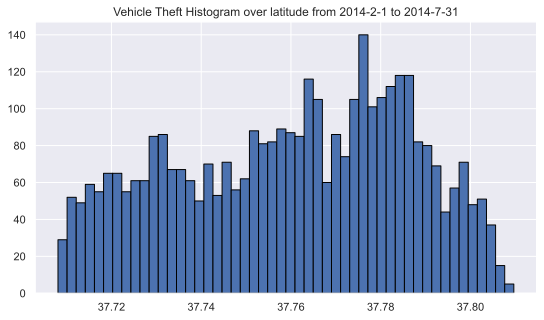

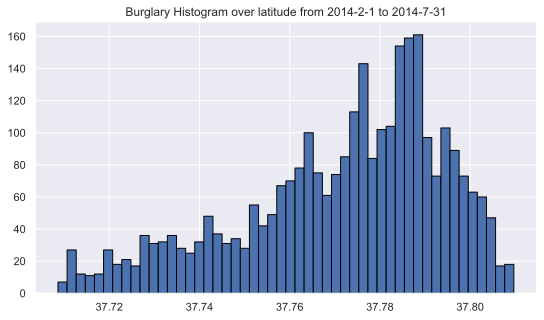

In [13]:
frq, edges = np.histogram(df_vth['Y'], bins=50)

fig, ax = plt.subplots(figsize=(9,5))
ax.bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
ax.set_title('Vehicle Theft Histogram over latitude from 2014-2-1 to 2014-7-31')

frq, edges = np.histogram(df_bg['Y'], bins=50)

fig, ax = plt.subplots(figsize=(9,5))
ax.bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
ax.set_title('Burglary Histogram over latitude from 2014-2-1 to 2014-7-31')
plt.show()

*Here we choose 'VEHICLE THEFT' and 'BURGLARY' with same time period February-July 2014.*

*From the histogram, Burglary's occurrence has a more concentrated geographical distribution. The bin size of 50 is proper that it reveals the difference in geographical details.*

# PART 4

> First start by plotting a map of San Francisco with a nice tight zoom. Simply use the command folium.Map([lat, lon], zoom_start=13), where you'll have to look up San Francisco's longitude and latitude.

In [14]:
import folium

sf_map = folium.Map([37.773972, -122.431297], tiles = "Stamen Toner", zoom_start=13)
sf_map

> Next, use the the coordinates for SF City Hall 37.77919, -122.41914 to indicate its location on the map with a nice, pop-up enabled maker. (In the screenshot below, I used the black & white Stamen tiles, because they look cool).

In [15]:
folium.Marker([37.77919, -122.41914], icon=folium.Icon(color='blue'), popup='City Hall').add_to(sf_map)
sf_map

> Now, let's plot some more data (no need for popups this time). Select a couple of months of data for 'DRUG/NARCOTIC' and draw a little dot for each arrest for those two months. You could, for example, choose June-July 2016, but you can choose anything you like - the main concern is to not have too many points as this uses a lot of memory and makes Folium behave non-optimally. We can call this a kind of visualization a point scatter plot.

In [16]:
df_drug = df[df['Category'] == 'DRUG/NARCOTIC']
mask = (df_drug['Date'] >= '2016-6-1') & (df_drug['Date'] <= '2016-7-31')
df_drug = df_drug.loc[mask]

for i in df_drug.index:
    folium.Marker([df_drug['Y'][i], df_drug['X'][i]], icon=folium.Icon(color='green')).add_to(sf_map)

sf_map

*The time period is June-July 2016.*

# PART 5

> For each of the three examples above, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. Also briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).

 The abnormal value of 'PROSTITUTION' on Thursday results in a high binned value at Thur12-13. By not noticing this error, some deviations in the estimated distribution pattern of data over time can happen. For example, inaccurate results are obtained when counting time periods when crimes occur more frequently.
 
 For crimes tend to be recorded at quarters, crimes happen at 19:56 are likely to be recorded as 20:00, this influences the bar-chart of hour for that crimes may be classified into the wrong bin. If you need to find out the hour of the highest crime in a day, this recording method will obviously lead to the estimation of the wrong data.
 
 The last error may be caused by wrong logging. This affects the bar-chart of latitude and longitude. This can lead to an incorrect geographic distribution. When the most crime-prone areas need to be calculated, this can lead to incorrect results as well.

 (Mikki, the above comments can be replaced by yours. Please feel free to remove them.)